In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

In [2]:
Kb = 1

In [3]:
""" """
def dvdt1(x, y, z, damping, Temperature):
    return -100 * y + damping * z

""" """
def dxdt1(x, y, z, damping, Temperature):
    return z

In [4]:
def harmonic_oscillator_energy(p, q):
    return 0.5 * p**2 + 0.5 * q**2

In [5]:
def RungeKuttaCoupled1(x, y, z, dx, dydx, dzdx, damping, T):
    # x --> t
    # y --> x
    # z --> v
    # dydx --> dx/dt = v
    # dzdx --> dv/dt = -x
    
    z = z + 6 * Kb * T * damping * (2 * np.random.uniform() - 1) #random velocity kick
    
    
    k1 = dx*dydx(x, y, z, damping, T)
    h1 = dx*dzdx(x, y, z, damping, T)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2., damping, T)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2., damping, T)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2., damping, T)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2., damping, T)
    k4 = dx*dydx(x+dx, y+k3, z+h3, damping, T)
    h4 = dx*dzdx(x+dx, y+k3, z+h3, damping, T)
    
    


    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    #x = x + dx
    
    return y, z

In [6]:
_TIME_STEP = 0.01

In [7]:
_INITAL_POSITION = 3
_INITAL_VELOCITY = 0

In [8]:
_N_TIME_STEPS = int(1e6)

In [9]:
time = 0
dt = _TIME_STEP
t_end = _N_TIME_STEPS * _TIME_STEP

In [10]:
positions = np.zeros(_N_TIME_STEPS)
velocities = np.zeros(_N_TIME_STEPS)
forces = np.zeros(_N_TIME_STEPS)

ENERGY = np.zeros(_N_TIME_STEPS)

In [11]:
positions[0] = _INITAL_POSITION
velocities[0] = _INITAL_VELOCITY

In [12]:
damping = 1e-5
T = 300

In [13]:
E = np.zeros(_N_TIME_STEPS)

In [14]:
for step in range(_N_TIME_STEPS - 1):
    p, v = RungeKuttaCoupled1(time, positions[step], velocities[step], dt, dxdt1, dvdt1, damping, T)
    positions[step + 1] = p
    velocities[step + 1] = v
    E[step] = harmonic_oscillator_energy(p, v)
    time = time + dt

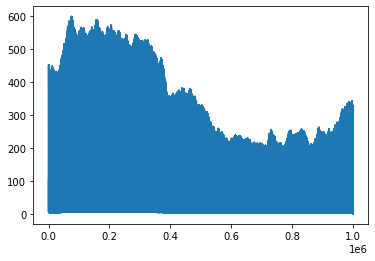

In [15]:
plt.plot(E)

In [16]:
np.average(E)

181.0241590495593

In [17]:
positions;

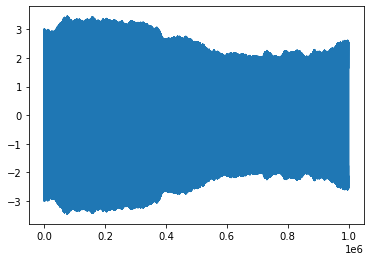

In [18]:
plt.plot(positions)

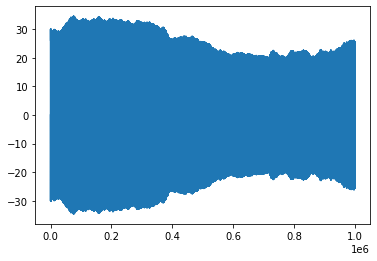

In [19]:
plt.plot(velocities)

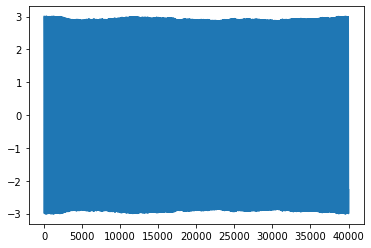

In [27]:
plt.plot(positions[:40000])
#plt.plot(velocities[:4000])

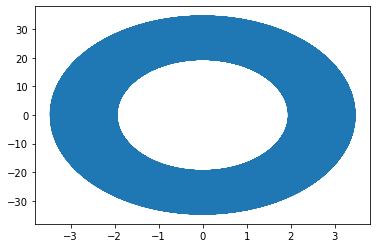

In [21]:
plt.plot(positions, velocities)

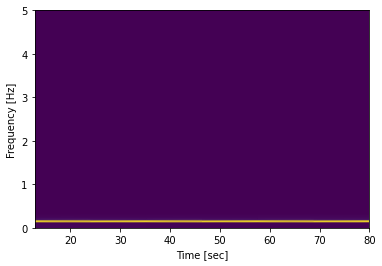

In [22]:
fs = 10
N = 1e5
f, t, Sxx = signal.spectrogram(positions[:1000], fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
df = f[3] - f[2]
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()